In [2]:
%matplotlib inline
import numpy as np
import pyross
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
## population and age classes
M=16  ## number of age classes

my_data = np.genfromtxt('../data/age_structures/Denmark-2019.csv', delimiter=',', skip_header=1)
aM, aF = my_data[:, 1], my_data[:, 2]

Ni=aM+aF;   Ni=Ni[0:M];  N=np.sum(Ni)

In [4]:
# Get individual contact matrices
CH, CW, CS, CO = pyross.contactMatrix.Denmark()

In [5]:
# Generate class with contact matrix for SIR model with UK contact structure
generator = pyross.contactMatrix.ContactMatrixFunction(CH, CW, CS, CO)

contactMatrix = generator.constant_contactMatrix()

## SIR

In [6]:
beta  = 0.01896278      # contact rate parameter
gIa   = 1./7            # removal rate of asymptomatic infectives 
gIs   = 1./7            # removal rate of symptomatic infectives 
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics


# initial conditions    
Is_0 = np.zeros((M));  Is_0[0:2]=5; Is_0[2:4]=15; Is_0[4:8]=67;  Is_0[8:10]=126; Is_0[10:12]=80
Ia_0 = np.zeros((M));  Ia_0[4:8]=0; Ia_0[8:11]=0
R_0  = np.zeros((M))
S_0  = Ni - (Ia_0 + Is_0 + R_0)


parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa, 'gIs':gIs,'fsa':fsa}
model = pyross.stochastic.SIR(parameters, M, Ni)


# start simulation
Tf=21;  Nf=700 
data=model.simulate(S_0, Ia_0, Is_0, contactMatrix, Tf, Nf)

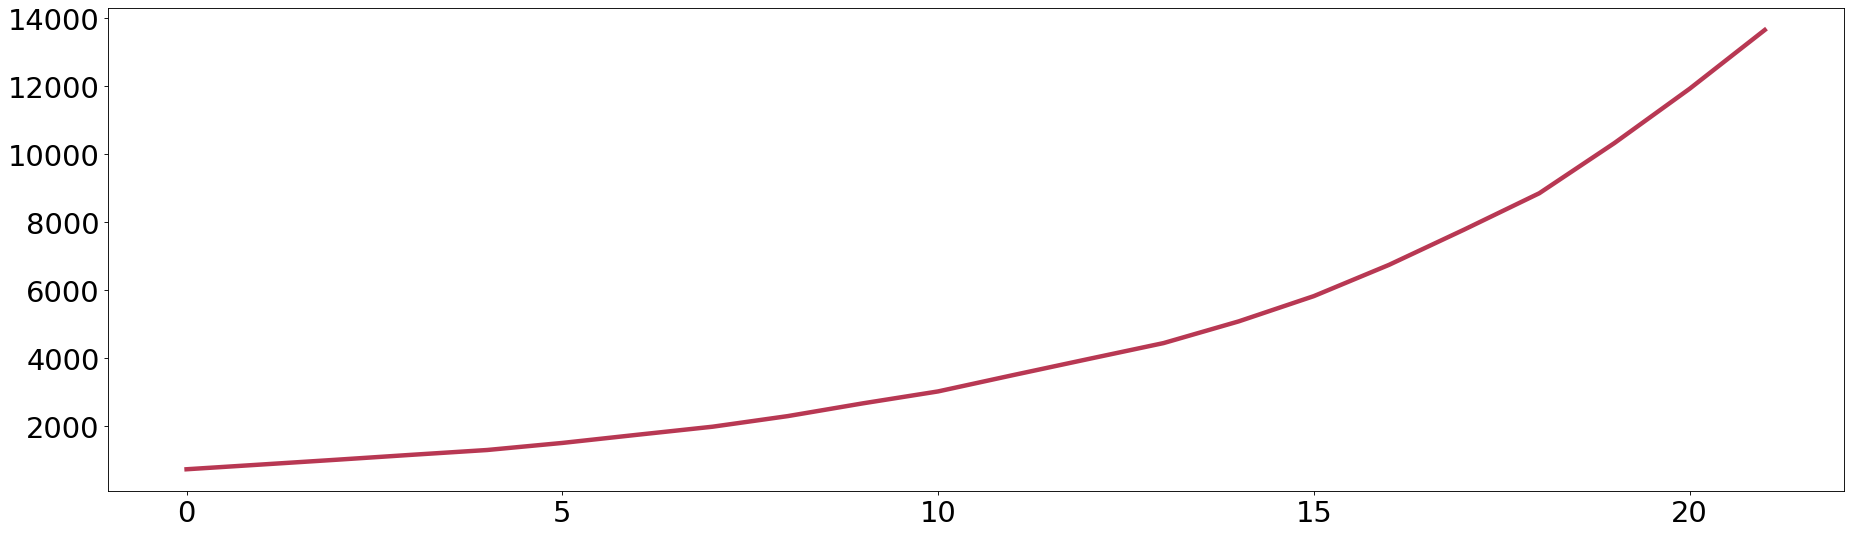

In [7]:
t = data['t']; 
Is = model.Is(data)
agedSummedIs = Is.sum(axis=1)

plt.rcParams.update({'font.size': 26})
fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(t, agedSummedIs, '-', lw=4, color='#A60628', label='forecast', alpha=0.8)

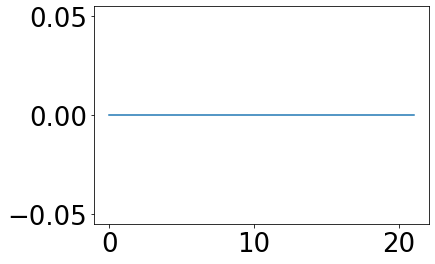

In [8]:
S  = model.S(data)
Is = model.Is(data)
Ia = model.Ia(data)
R  = model.R(data)
plt.plot( (S+Ia+Is+R).sum(axis=1) - N );

## SEIR

In [9]:
beta  = 0.01896278      # contact rate parameter
gIa   = 1./7            # removal rate of asymptomatic infectives 
gIs   = 1./7            # removal rate of symptomatic infectives 
gE    = 1/4             # rate to go from E to I
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics


# initial conditions    
Is_0 = np.zeros((M));  Is_0[0:2]=5; Is_0[2:4]=15; 
Ia_0 = np.zeros((M));  Ia_0[4:8]=0; Ia_0[8:11]=0
E_0 = np.zeros((M));  E_0[2:14]=2
R_0  = np.zeros((M))
S_0  = Ni - (Ia_0 + Is_0 + R_0)


parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa, 'gE':gE, 'gIa':gIa,'gIs':gIs,'fsa':fsa}
model = pyross.stochastic.SEIR(parameters, M, Ni)


# start simulation
Tf=54;  Nf=700 
data=model.simulate(S_0, E_0, Ia_0, Is_0, contactMatrix, Tf, Nf)

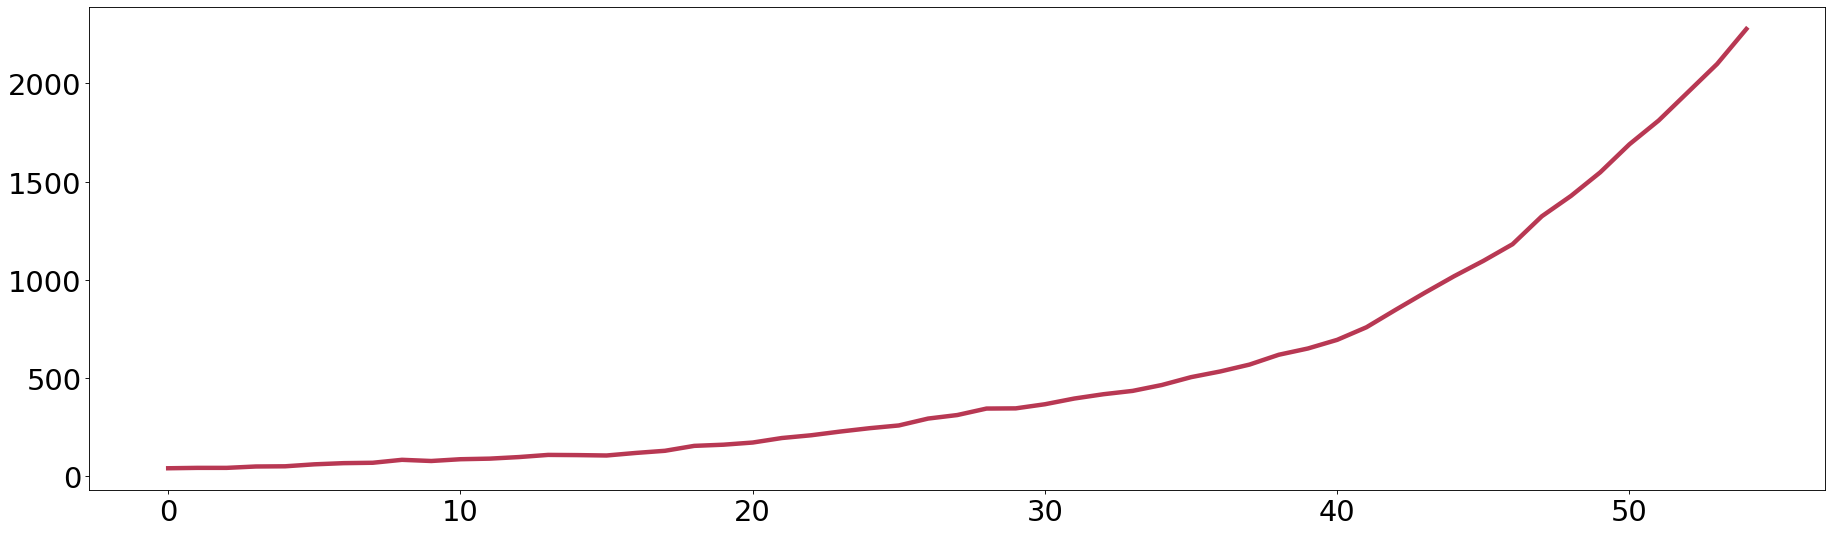

In [10]:
t = data['t']; 
Is = model.Is(data)
agedSummedIs = Is.sum(axis=1)

plt.rcParams.update({'font.size': 26})
fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, agedSummedIs, '-', lw=4, color='#A60628', label='forecast', alpha=0.8);